Diego Isaac Rodriguez Monsivaiz, 1951669,LMV,N1
170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5039 - accuracy: 0.4473 - val_loss: 1.2358 - val_accuracy: 0.5584
Epoch 2/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1654 - accuracy: 0.5859 - val_loss: 1.1355 - val_accuracy: 0.6025
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0152 - accuracy: 0.6427 - val_loss: 1.0324 - val_accuracy: 0.6331
Epoch 4/5
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9111 - accuracy: 0.6788 - val_loss: 0.9796 - val_accuracy: 0.6527
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8359 - accuracy: 0.7068 - val_loss: 0.9265 - val_accuracy: 0.6784
313/313 - 6s - loss: 0.9265 - accuracy: 0.6784 - 6s/epoch - 18ms/step
Precisión en los datos de prueba: 0.6783999800682068


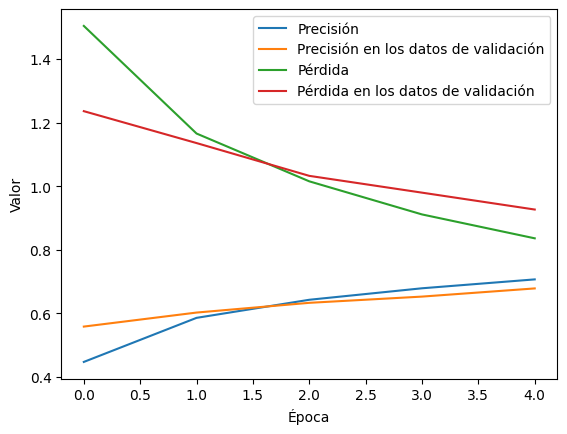

In [1]:
print("Diego Isaac Rodriguez Monsivaiz, 1951669,LMV,N1")
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Definir las etiquetas de clase
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Construir el modelo de la red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc)

# Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['val_accuracy'], label='Precisión en los datos de validación')
plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida en los datos de validación')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()
plt.show()
